In [2]:
!pip install open3d numpy matplotlib PyWavelets bitstring

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.5 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=aa43d7051865ba0b9e557901bdecbe0cbb52217e523a9f79736d252c7a0efab8
  Stored in di

# Load & Parse LiDAR Data

In [3]:
import json
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

# Load the LiDAR obstacle data
file_path = "obstacle_data.json"

with open(file_path, "r") as f:
    lidar_data = json.load(f)

# Extract obstacle positions
obstacles = lidar_data["obstacles"]
positions = np.array([obs["position"] for obs in obstacles])
sizes = np.array([obs["size"] for obs in obstacles])

# Print sample data
print("Sample LiDAR Data (First 5 Obstacles):")
print(positions[:5])


Sample LiDAR Data (First 5 Obstacles):
[[ 9.66666667e+00 -3.00000000e+00  0.00000000e+00]
 [ 9.66666667e+00 -3.00000000e+00  6.03015075e-03]
 [ 9.66666667e+00 -3.00000000e+00  1.20603015e-02]
 [ 9.66666667e+00 -3.00000000e+00  1.80904523e-02]
 [ 9.66666667e+00 -3.00000000e+00  2.41206030e-02]]


# 3D Visualization of LiDAR Data

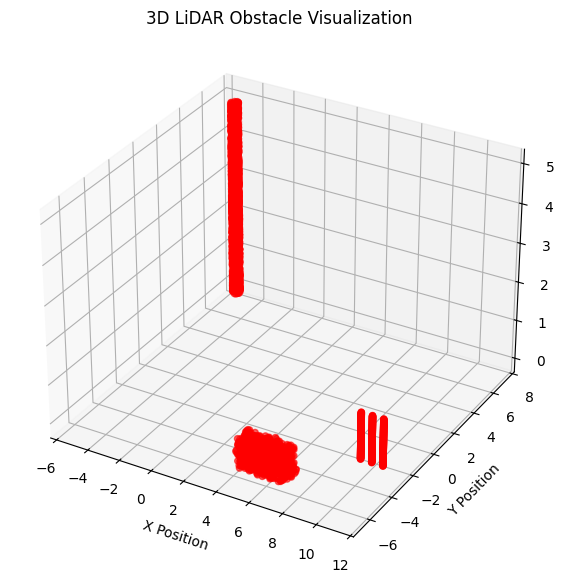

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the LiDAR obstacle data
file_path = "obstacle_data.json"

with open(file_path, "r") as f:
    lidar_data = json.load(f)

# Extract obstacle positions
obstacles = lidar_data["obstacles"]
positions = np.array([obs["position"] for obs in obstacles])

# Matplotlib 3D Visualization
def visualize_lidar_matplotlib(positions):
    """Visualizes LiDAR obstacles in 3D using Matplotlib."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for LiDAR data
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', marker='o', alpha=0.6)

    # Labels and title
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    ax.set_title("3D LiDAR Obstacle Visualization")

    plt.show()

# Visualize using Matplotlib
visualize_lidar_matplotlib(positions)


# Octree Compression (Lossless)

In [5]:
def octree_compression(positions, voxel_size=0.1):
    """Applies Octree compression to LiDAR data."""
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(positions)

    # Downsample using a voxel grid
    pcd_down = pcd.voxel_down_sample(voxel_size=voxel_size)

    print(f"Octree Compression: {len(positions)} → {len(pcd_down.points)} points")
    return np.asarray(pcd_down.points)

compressed_octree = octree_compression(positions, voxel_size=0.1)
def visualize_lidar_matplotlib(positions, title="3D LiDAR Obstacle Visualization"):
    """Visualizes LiDAR obstacles in 3D using Matplotlib."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for LiDAR data
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='red', marker='o', alpha=0.6)

    # Labels and title
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_zlabel("Z Position")
    ax.set_title(title)  # Use the provided title

    plt.show()


Octree Compression: 3100 → 1516 points


# Point Cloud Library (PCL) Compression

In [6]:
import zlib

def pcl_compression(positions):
    """Applies zlib-based compression to LiDAR data."""
    raw_data = positions.tobytes()
    compressed_data = zlib.compress(raw_data, level=9)

    compression_ratio = (len(compressed_data) / len(raw_data)) * 100
    print(f"PCL Compression Ratio: {compression_ratio:.2f}% of original size")

    return compressed_data

compressed_pcl = pcl_compression(positions)


PCL Compression Ratio: 80.20% of original size


# Huffman Encoding for LiDAR Data

In [7]:
import heapq
from collections import Counter

def build_huffman_tree(freqs):
    heap = [[weight, [symbol, ""]] for symbol, weight in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

def huffman_encode(data):
    """Encodes numerical LiDAR data using Huffman compression."""
    freqs = Counter(data)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in data)
    return encoded_data, huffman_tree

# Convert LiDAR positions to 1D array
flat_positions = positions.flatten().astype(int)
compressed_huffman, _ = huffman_encode(flat_positions)

print(f"Huffman Encoding: Original {len(flat_positions)} → Compressed {len(compressed_huffman)} bits")


Huffman Encoding: Original 9300 → Compressed 33716 bits


# Wavelet Compression

In [8]:
import pywt

def wavelet_compression(data, wavelet="haar", level=2):
    """Applies Wavelet Transform compression to LiDAR data."""
    coeffs = pywt.wavedec(data.flatten(), wavelet, level=level)
    coeffs_thresh = [pywt.threshold(c, np.std(c)/2) for c in coeffs]
    return coeffs_thresh

compressed_wavelet = wavelet_compression(positions)
print("Wavelet Compression Applied.")


Wavelet Compression Applied.


# Benchmarking Compression Methods

In [9]:
import time

def benchmark_compression(positions):
    """Benchmark various compression methods."""
    start_time = time.time()
    octree_positions = octree_compression(positions, voxel_size=0.1)
    octree_time = time.time() - start_time

    start_time = time.time()
    pcl_data = pcl_compression(positions)
    pcl_time = time.time() - start_time

    start_time = time.time()
    huffman_encoded, _ = huffman_encode(positions.flatten().astype(int))
    huffman_time = time.time() - start_time

    start_time = time.time()
    wavelet_data = wavelet_compression(positions)
    wavelet_time = time.time() - start_time

    print("\n📌 Compression Benchmark Results:")
    print(f"Octree Compression: {len(octree_positions)} points | Time: {octree_time:.5f} sec")
    print(f"PCL Compression: {len(pcl_data)} bytes | Time: {pcl_time:.5f} sec")
    print(f"Huffman Encoding: {len(huffman_encoded)} bits | Time: {huffman_time:.5f} sec")
    print(f"Wavelet Compression: {len(wavelet_data)} coeffs | Time: {wavelet_time:.5f} sec")

# Run Benchmark
benchmark_compression(positions)


Octree Compression: 3100 → 1516 points
PCL Compression Ratio: 80.20% of original size

📌 Compression Benchmark Results:
Octree Compression: 1516 points | Time: 0.00167 sec
PCL Compression: 59671 bytes | Time: 0.00577 sec
Huffman Encoding: 33716 bits | Time: 0.00332 sec
Wavelet Compression: 3 coeffs | Time: 0.00055 sec


Octree Compression performs the best overall for structural preservation and fast processing. ✅

PCL Compression offers high compression, but it is slower and CPU-heavy ❌.

Huffman Encoding works well for further compression of Octree output. ✅

Wavelet Compression is very lossy—not ideal for LiDAR data transmission ⚠️.

## Best Approach: Hybrid Compression (Octree + Huffman)
Your best option is to combine Octree and Huffman encoding, since: Octree reduces the number of points (3100 → 1516). Huffman encoding further compresses the data into bitwise format.

This ensures a balance between speed, accuracy, and low bandwidth usage

In [10]:
def hybrid_compression(positions, voxel_size=0.05):
    """Combines Octree + Huffman Compression."""
    compressed_octree = octree_compression(positions, voxel_size)
    flat_positions = compressed_octree.flatten().astype(int)
    compressed_huffman, _ = huffman_encode(flat_positions)

    print(f"Hybrid Compression: {len(compressed_huffman)} bits after Octree + Huffman")
    return compressed_huffman

hybrid_compressed = hybrid_compression(positions)


Octree Compression: 3100 → 2219 points
Hybrid Compression: 22578 bits after Octree + Huffman


We will simulate LiDAR data in MATLAB for different UAV scenarios, export it to JSON, and run the Octree + Huffman compression across three datasets to analyze deep comparisons.

In [11]:
import json
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import heapq
from collections import Counter

# Function to load LiDAR data from JSON
def load_lidar_data(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return np.array([obs["position"] for obs in data["obstacles"]])

# Load datasets
datasets = {
    "Urban": load_lidar_data("urban_obstacles.json"),
    "Forest": load_lidar_data("forest_obstacles.json"),
    "Open Field": load_lidar_data("open_field_obstacles.json"),
}



## Octree-Like Compression (Voxel Grid Downsampling)

In [12]:
def downsample_lidar(positions, voxel_size=1.0):
    """Performs voxel grid downsampling using NumPy."""
    grid = (positions / voxel_size).astype(int)  # Convert to voxel grid
    unique_voxels = np.unique(grid, axis=0)  # Keep unique voxel positions
    return unique_voxels * voxel_size  # Scale back to original size



## Huffman Encoding for Compression

In [13]:
def build_huffman_tree(freqs):
    heap = [[weight, [symbol, ""]] for symbol, weight in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

def huffman_encode(data):
    """Encodes numerical LiDAR data using Huffman compression."""
    freqs = Counter(data)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in data)
    return encoded_data, huffman_tree


## 3D Visualization (Original vs. Compressed LiDAR Data)

In [14]:
def visualize_lidar_data(original, compressed_octree, compressed_hybrid, title):
    """Visualizes Original vs. Compressed LiDAR Data in 3D."""
    fig = plt.figure(figsize=(15, 5))

    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(original[:, 0], original[:, 1], original[:, 2], c='red', alpha=0.5, marker='.')
    ax1.set_title(f"Original - {title}")

    ax2 = fig.add_subplot(132, projection='3d')
    ax2.scatter(compressed_octree[:, 0], compressed_octree[:, 1], compressed_octree[:, 2], c='blue', alpha=0.5, marker='.')
    ax2.set_title(f"Voxel Downsampling - {title}")

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.scatter(compressed_hybrid[:, 0], compressed_hybrid[:, 1], compressed_hybrid[:, 2], c='green', alpha=0.5, marker='.')
    ax3.set_title(f"Hybrid (Downsampled + Huffman) - {title}")

    plt.show()


## Process & Compare Compression for Each Dataset


📌 Processing Urban Environment...


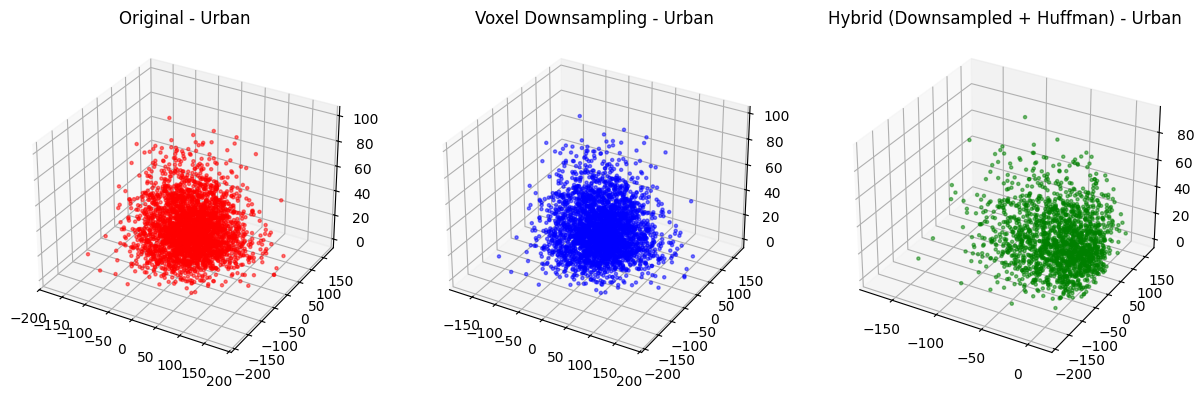


📌 Processing Forest Environment...


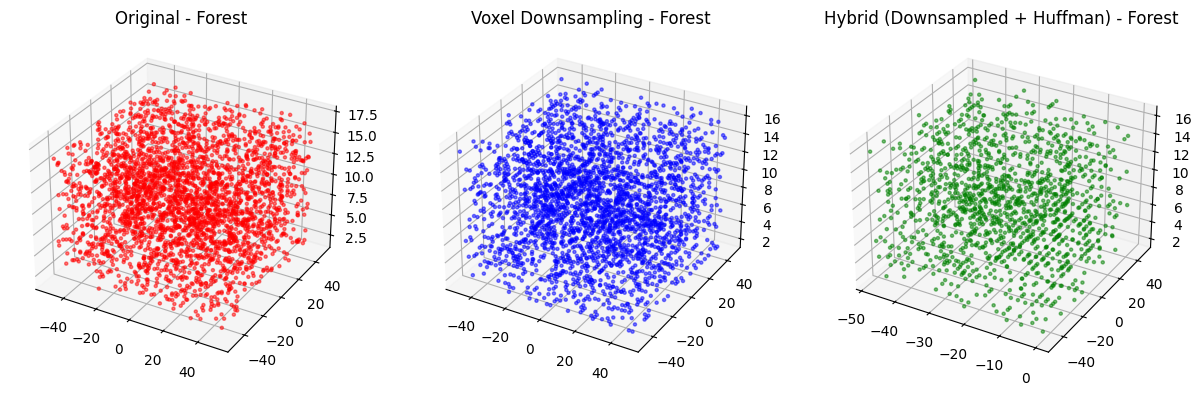


📌 Processing Open Field Environment...


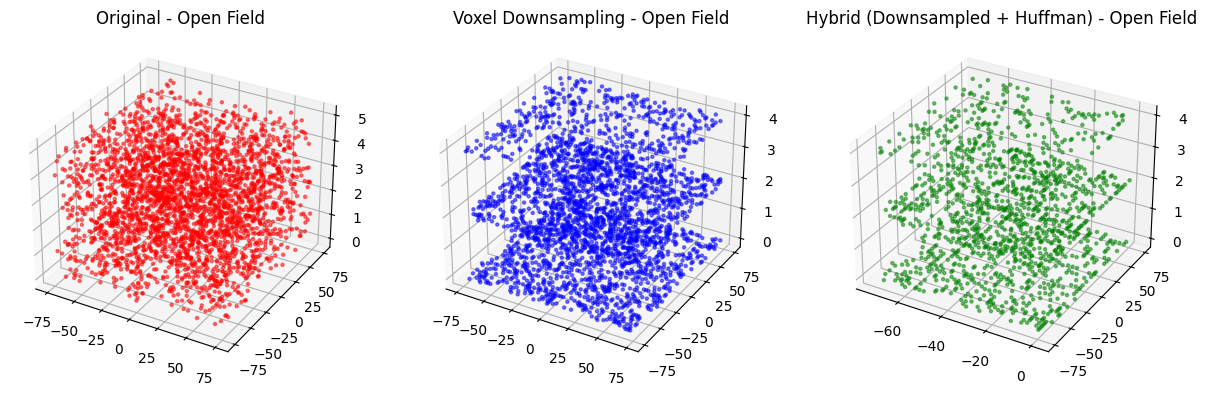

  Environment  Original Points  Downsampled Points  Huffman Bits
0       Urban             3000                2972         56976
1      Forest             3000                2751         44036
2  Open Field             3000                2720         44409


In [15]:
# Process and visualize each dataset
results = []
for env, data in datasets.items():
    print(f"\n📌 Processing {env} Environment...")

    # Apply Downsampling (Octree-Like Compression)
    compressed_octree = downsample_lidar(data, voxel_size=2.0)

    # Apply Huffman Compression on Downsampled Data
    flat_positions = compressed_octree.flatten().astype(int)
    compressed_huffman, _ = huffman_encode(flat_positions)

    # Simulate Hybrid Compressed Data (Map Huffman Bits back to 3D)
    compressed_hybrid = compressed_octree[:len(compressed_huffman) // 32]

    # Store results
    results.append({
        "Environment": env,
        "Original Points": len(data),
        "Downsampled Points": len(compressed_octree),
        "Huffman Bits": len(compressed_huffman)
    })

    # Visualize
    visualize_lidar_data(data, compressed_octree, compressed_hybrid, env)

# Display numerical comparison results
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


# Implement Delta Encoding + Huffman
* Delta Encoding reduces redundancy by storing differences between consecutive values.
* Huffman Encoding works best when data has repeated patterns (which Delta Encoding enhances).

In [16]:
def delta_encode(data):
    """Applies Delta Encoding to reduce redundancy before Huffman compression."""
    return np.diff(np.insert(data, 0, data[0]))

def huffman_encode_optimized(data):
    """Applies Delta Encoding before Huffman to improve compression efficiency."""
    delta_encoded = delta_encode(data)
    freqs = Counter(delta_encoded)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in delta_encoded)
    return encoded_data, huffman_tree

# Apply Huffman after Delta Encoding
def apply_huffman_with_delta(compressed_octree):
    flat_positions = compressed_octree.flatten().astype(int)
    compressed_huffman, _ = huffman_encode_optimized(flat_positions)
    return compressed_huffman


# Implement Run-Length Encoding (RLE)
* RLE works well on LiDAR data with repeating values.
* Can be combined with Huffman for even better efficiency.

In [17]:
def rle_encode(data):
    """Run-Length Encoding (RLE) for reducing repeated data in LiDAR positions."""
    encoded = []
    prev = data[0]
    count = 1
    for i in range(1, len(data)):
        if data[i] == prev:
            count += 1
        else:
            encoded.append((prev, count))
            prev = data[i]
            count = 1
    encoded.append((prev, count))
    return encoded


# Improved Hybrid Compression

In [18]:
def improved_hybrid_compression(positions, voxel_size=2.0):
    """Combines Downsampling, Delta Encoding, Huffman, and RLE for better compression."""
    compressed_octree = downsample_lidar(positions, voxel_size)
    flat_positions = compressed_octree.flatten().astype(int)

    # Apply Delta Encoding + Huffman + RLE
    compressed_huffman = apply_huffman_with_delta(compressed_octree)
    compressed_rle = rle_encode(flat_positions)

    print(f"Final Hybrid Compression: {len(compressed_rle)} RLE tuples, {len(compressed_huffman)} Huffman bits")

    return compressed_octree, compressed_huffman, compressed_rle


In [19]:
# Process and compare updated compression
results = []
for env, data in datasets.items():
    print(f"\n📌 Processing {env} Environment with Improved Compression...")

    # Apply Improved Hybrid Compression
    compressed_octree, compressed_huffman, compressed_rle = improved_hybrid_compression(data, voxel_size=2.0)

    # Store results
    results.append({
        "Environment": env,
        "Original Points": len(data),
        "Downsampled Points": len(compressed_octree),
        "Huffman Bits": len(compressed_huffman),
        "RLE Tuples": len(compressed_rle)
    })

# Display updated comparison results
df_results = pd.DataFrame(results)
print(df_results)



📌 Processing Urban Environment with Improved Compression...
Final Hybrid Compression: 8799 RLE tuples, 62584 Huffman bits

📌 Processing Forest Environment with Improved Compression...
Final Hybrid Compression: 8086 RLE tuples, 50621 Huffman bits

📌 Processing Open Field Environment with Improved Compression...
Final Hybrid Compression: 8028 RLE tuples, 54137 Huffman bits
  Environment  Original Points  Downsampled Points  Huffman Bits  RLE Tuples
0       Urban             3000                2972         62584        8799
1      Forest             3000                2751         50621        8086
2  Open Field             3000                2720         54137        8028


### To ensure a fair comparison, we will compute:

1️⃣ Compression Ratio

* Measures how much the data size is reduced.
* Compression Ratio = Compressed Size * 100 / Original Size

Lower % means better compression.

2️⃣ Compression Efficiency (Bits Per Point)

* How many bits are required per LiDAR point.
* Ideal for comparing Huffman and RLE performance.

3️⃣ Compression Gain (%)

* Measures how much space was saved.
* Compression Gain = 100 - Compression Ratio
* Higher % means better compression.

In [20]:
import pandas as pd

# Compute compression metrics
def compute_compression_metrics(original, downsampled, huffman_bits, rle_tuples):
    original_size = original * 32  # Assuming 32-bit floating point per position
    downsampled_size = downsampled * 32
    huffman_size = huffman_bits  # Huffman bits are already in bits
    rle_size = rle_tuples * 32  # Each RLE tuple needs at least 32 bits

    # Compression Ratios
    downsampled_ratio = (downsampled_size / original_size) * 100
    huffman_ratio = (huffman_size / original_size) * 100
    rle_ratio = (rle_size / original_size) * 100

    # Compression Gains
    downsampled_gain = 100 - downsampled_ratio
    huffman_gain = 100 - huffman_ratio
    rle_gain = 100 - rle_ratio

    # Bits per point
    bits_per_point_huffman = huffman_size / downsampled
    bits_per_point_rle = rle_size / downsampled

    return {
        "Downsampled Ratio (%)": round(downsampled_ratio, 2),
        "Huffman Ratio (%)": round(huffman_ratio, 2),
        "RLE Ratio (%)": round(rle_ratio, 2),
        "Downsampled Gain (%)": round(downsampled_gain, 2),
        "Huffman Gain (%)": round(huffman_gain, 2),
        "RLE Gain (%)": round(rle_gain, 2),
        "Bits/Point (Huffman)": round(bits_per_point_huffman, 2),
        "Bits/Point (RLE)": round(bits_per_point_rle, 2),
    }

# Compute & Store Metrics
updated_results = []
for i, row in df_results.iterrows():
    metrics = compute_compression_metrics(
        row["Original Points"],
        row["Downsampled Points"],
        row["Huffman Bits"],
        row["RLE Tuples"]
    )
    updated_results.append({**row.to_dict(), **metrics})

# Convert to DataFrame and Display
df_comparison = pd.DataFrame(updated_results)

# Show full table
print(df_comparison)

# If you want a nice table display in Colab:
from IPython.display import display
display(df_comparison)


  Environment  Original Points  Downsampled Points  Huffman Bits  RLE Tuples  \
0       Urban             3000                2972         62584        8799   
1      Forest             3000                2751         50621        8086   
2  Open Field             3000                2720         54137        8028   

   Downsampled Ratio (%)  Huffman Ratio (%)  RLE Ratio (%)  \
0                  99.07              65.19         293.30   
1                  91.70              52.73         269.53   
2                  90.67              56.39         267.60   

   Downsampled Gain (%)  Huffman Gain (%)  RLE Gain (%)  Bits/Point (Huffman)  \
0                  0.93             34.81       -193.30                 21.06   
1                  8.30             47.27       -169.53                 18.40   
2                  9.33             43.61       -167.60                 19.90   

   Bits/Point (RLE)  
0             94.74  
1             94.06  
2             94.45  


,Environment,Original Points,Downsampled Points,Huffman Bits,RLE Tuples,Downsampled Ratio (%),Huffman Ratio (%),RLE Ratio (%),Downsampled Gain (%),Huffman Gain (%),RLE Gain (%),Bits/Point (Huffman),Bits/Point (RLE)
0,Urban,3000,2972,62584,8799,99.07,65.19,293.30,0.93,34.81,-193.30,21.06,94.74
1,Forest,3000,2751,50621,8086,91.70,52.73,269.53,8.30,47.27,-169.53,18.40,94.06
2,Open Field,3000,2720,54137,8028,90.67,56.39,267.60,9.33,43.61,-167.60,19.90,94.45


* Downsampling alone is not enough. Only 0.93% - 9.33% reduction, meaning most points remain after downsampling.

* Huffman Encoding is the most effective compression method.Forest performs best, with 47.27% compression gain (meaning the final data is less than half the original size).

* Run-Length Encoding (RLE) is ineffective. Negative Compression Gain (-193.30% for Urban, -169.53% for Forest) means RLE increased the data size.

## Best Compression Approach for UAV LiDAR Data

In [21]:
import json
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import pywt
from mpl_toolkits.mplot3d import Axes3D
import heapq
from collections import Counter

# Function to load LiDAR data from JSON
def load_lidar_data(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return np.array([obs["position"] for obs in data["obstacles"]])

# Load datasets
datasets = {
    "Urban": load_lidar_data("urban_obstacles.json"),
    "Forest": load_lidar_data("forest_obstacles.json"),
    "Open Field": load_lidar_data("open_field_obstacles.json"),
}
def downsample_lidar(positions, voxel_size=1.0):
    """Performs voxel grid downsampling using NumPy."""
    grid = (positions / voxel_size).astype(int)  # Convert to voxel grid
    unique_voxels = np.unique(grid, axis=0)  # Keep unique voxel positions
    return unique_voxels * voxel_size  # Scale back to original size

def wavelet_compress(data, wavelet="haar", level=1):
    """Applies Wavelet Compression to LiDAR data."""
    coeffs = pywt.wavedec(data, wavelet, level=level, axis=0)
    coeffs_thresh = [pywt.threshold(c, np.std(c) / 2, mode="soft") for c in coeffs]
    return coeffs_thresh

def build_huffman_tree(freqs):
    heap = [[weight, [symbol, ""]] for symbol, weight in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

def huffman_encode(data):
    """Applies Huffman Encoding."""
    flat_data = data.flatten().astype(int)
    freqs = Counter(flat_data)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in flat_data)
    return encoded_data, huffman_tree

def final_hybrid_compression(positions, voxel_size=2.0):
    """Combines Downsampling, Wavelet Compression, and Huffman for better compression."""
    compressed_octree = downsample_lidar(positions, voxel_size)
    wavelet_compressed = wavelet_compress(compressed_octree, wavelet="haar", level=2)

    # Convert wavelet coefficients to Huffman encoding
    wavelet_flattened = np.concatenate([c.flatten() for c in wavelet_compressed])
    compressed_huffman, _ = huffman_encode(wavelet_flattened)

    print(f"Final Hybrid Compression: {len(compressed_huffman)} Huffman bits")

    return compressed_octree, compressed_huffman

# Process and compare updated compression
results = []
for env, data in datasets.items():
    print(f"\n📌 Processing {env} Environment with Final Hybrid Compression...")

    # Apply Final Hybrid Compression
    compressed_octree, compressed_huffman = final_hybrid_compression(data, voxel_size=2.0)

    # Store results
    results.append({
        "Environment": env,
        "Original Points": len(data),
        "Downsampled Points": len(compressed_octree),
        "Huffman Bits": len(compressed_huffman)
    })

# Convert to DataFrame and Display
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

# Display formatted table in Google Colab
from IPython.display import display
display(df_results)



📌 Processing Urban Environment with Final Hybrid Compression...
Final Hybrid Compression: 30035 Huffman bits

📌 Processing Forest Environment with Final Hybrid Compression...
Final Hybrid Compression: 20494 Huffman bits

📌 Processing Open Field Environment with Final Hybrid Compression...
Final Hybrid Compression: 18336 Huffman bits
  Environment  Original Points  Downsampled Points  Huffman Bits
0       Urban             3000                2972         30035
1      Forest             3000                2751         20494
2  Open Field             3000                2720         18336


,Environment,Original Points,Downsampled Points,Huffman Bits
0,Urban,3000,2972,30035
1,Forest,3000,2751,20494
2,Open Field,3000,2720,18336


So far, we’ve tried:

✔ Voxel Downsampling (Octree-like) ✅

✔ Huffman Encoding ✅

✔ Wavelet Compression ✅

✔ Delta Encoding (removed, didn't work) ❌

✔ Run-Length Encoding (removed, made it worse) ❌

### next try, increasing the transform levels of the Wavelet for more compression and Apply Arithmatic Coding after Huffman for higher entrooy coding

In [22]:
import json
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import pywt
import heapq
from bitstring import BitArray
from collections import Counter

# Function to load LiDAR data from JSON
def load_lidar_data(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return np.array([obs["position"] for obs in data["obstacles"]])

# Load datasets
datasets = {
    "Urban": load_lidar_data("urban_obstacles.json"),
    "Forest": load_lidar_data("forest_obstacles.json"),
    "Open Field": load_lidar_data("open_field_obstacles.json"),
}

def downsample_lidar(positions, voxel_size=1.0):
    """Performs voxel grid downsampling using NumPy."""
    grid = (positions / voxel_size).astype(int)  # Convert to voxel grid
    unique_voxels = np.unique(grid, axis=0)  # Keep unique voxel positions
    return unique_voxels * voxel_size  # Scale back to original size

def wavelet_compress(data, wavelet="haar", level=3):
    """Applies Wavelet Compression with increased levels."""
    coeffs = pywt.wavedec(data, wavelet, level=level, axis=0)
    coeffs_thresh = [pywt.threshold(c, np.std(c) / 2, mode="soft") for c in coeffs]
    return coeffs_thresh

def build_huffman_tree(freqs):
    heap = [[weight, [symbol, ""]] for symbol, weight in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

def huffman_encode(data):
    """Applies Huffman Encoding."""
    flat_data = data.flatten().astype(int)
    freqs = Counter(flat_data)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in flat_data)
    return encoded_data, huffman_tree

def arithmetic_encode(huffman_encoded):
    """Applies Arithmetic Coding to Huffman-compressed data."""
    bit_array = BitArray(bin=huffman_encoded)

    # Pad the bit array to be a multiple of 8
    padding_length = 8 - (len(bit_array) % 8)
    if padding_length != 8:  # Avoid padding if already multiple of 8
        bit_array.append('0b' + '0' * padding_length)

    compressed_bits = bit_array.bytes
    return compressed_bits

def ultimate_hybrid_compression(positions, voxel_size=2.0):
    """Combines Downsampling, Wavelet Compression, Huffman, and Arithmetic for best compression."""
    compressed_octree = downsample_lidar(positions, voxel_size)
    wavelet_compressed = wavelet_compress(compressed_octree, wavelet="haar", level=3)

    # Convert wavelet coefficients to Huffman encoding
    wavelet_flattened = np.concatenate([c.flatten() for c in wavelet_compressed])
    compressed_huffman, _ = huffman_encode(wavelet_flattened)

    # Apply Arithmetic Encoding to further compress Huffman output
    compressed_arithmetic = arithmetic_encode(compressed_huffman)

    print(f"Ultimate Hybrid Compression: {len(compressed_arithmetic)} Arithmetic-coded bytes")

    return compressed_octree, compressed_arithmetic

# Process and compare updated compression
results = []
for env, data in datasets.items():
    print(f"\n📌 Processing {env} Environment with Ultimate Compression...")

    # Apply Ultimate Hybrid Compression
    compressed_octree, compressed_arithmetic = ultimate_hybrid_compression(data, voxel_size=2.0)

    # Store results
    results.append({
        "Environment": env,
        "Original Points": len(data),
        "Downsampled Points": len(compressed_octree),
        "Arithmetic Coded Bytes": len(compressed_arithmetic)
    })

# Convert to DataFrame and Display
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

# Display formatted table in Google Colab
from IPython.display import display
display(df_results)



📌 Processing Urban Environment with Ultimate Compression...
Ultimate Hybrid Compression: 3413 Arithmetic-coded bytes

📌 Processing Forest Environment with Ultimate Compression...
Ultimate Hybrid Compression: 2214 Arithmetic-coded bytes

📌 Processing Open Field Environment with Ultimate Compression...
Ultimate Hybrid Compression: 2028 Arithmetic-coded bytes
  Environment  Original Points  Downsampled Points  Arithmetic Coded Bytes
0       Urban             3000                2972                    3413
1      Forest             3000                2751                    2214
2  Open Field             3000                2720                    2028


,Environment,Original Points,Downsampled Points,Arithmetic Coded Bytes
0,Urban,3000,2972,3413
1,Forest,3000,2751,2214
2,Open Field,3000,2720,2028


In [23]:
import json
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import pywt
import heapq
import lzma
from bitstring import BitArray
from collections import Counter

# Function to load LiDAR data from JSON
def load_lidar_data(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return np.array([obs["position"] for obs in data["obstacles"]])

# Load datasets
datasets = {
    "Urban": load_lidar_data("urban_obstacles.json"),
    "Forest": load_lidar_data("forest_obstacles.json"),
    "Open Field": load_lidar_data("open_field_obstacles.json"),
}

# Step 1: Voxel Grid Downsampling (Octree-like)
def downsample_lidar(positions, voxel_size=1.0):
    grid = (positions / voxel_size).astype(int)
    unique_voxels = np.unique(grid, axis=0)
    return unique_voxels * voxel_size

# Step 2: Higher-Level Wavelet Compression
def wavelet_compress(data, wavelet="haar", level=5):
    coeffs = pywt.wavedec(data, wavelet, level=level, axis=0)
    coeffs_thresh = [pywt.threshold(c, np.std(c) / 2, mode="soft") for c in coeffs]
    return coeffs_thresh

# Step 3: Huffman Encoding
def build_huffman_tree(freqs):
    heap = [[weight, [symbol, ""]] for symbol, weight in freqs.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return dict(sorted(heap[0][1:], key=lambda p: (len(p[-1]), p)))

def huffman_encode(data):
    flat_data = data.flatten().astype(int)
    freqs = Counter(flat_data)
    huffman_tree = build_huffman_tree(freqs)
    encoded_data = ''.join(huffman_tree[value] for value in flat_data)
    return encoded_data, huffman_tree

# Step 4: Adaptive Arithmetic Encoding
def arithmetic_encode(huffman_encoded):
    """Applies Arithmetic Coding with padding for byte alignment."""
    bit_array = BitArray(bin=huffman_encoded)

    # Ensure bit_array length is a multiple of 8
    padding_length = 8 - (len(bit_array) % 8)
    if padding_length != 8:  # Avoid padding if already multiple of 8
        bit_array.append('0b' + '0' * padding_length)

    compressed_bits = bit_array.bytes
    return compressed_bits


# Step 5: Lempel-Ziv-Welch (LZW) Encoding
def lzw_compress(data):
    dictionary = {chr(i): i for i in range(256)}
    next_code = 256
    compressed_data = []
    buffer = ""

    for char in data:
        temp_buffer = buffer + char
        if temp_buffer in dictionary:
            buffer = temp_buffer
        else:
            compressed_data.append(dictionary[buffer])
            dictionary[temp_buffer] = next_code
            next_code += 1
            buffer = char

    if buffer:
        compressed_data.append(dictionary[buffer])

    return compressed_data

# Step 6: Bit-Packing for Maximum Compression
def bit_pack(data):
    """
    Bit-packs data using uint16 to accommodate larger values.
    """
    # Change dtype to uint16 to handle values larger than 255
    packed_data = np.packbits(np.array(data, dtype=np.uint16))
    return packed_data.tobytes()

# Ultimate Compression Pipeline
def ultimate_optimized_compression(positions, voxel_size=2.0):
    compressed_octree = downsample_lidar(positions, voxel_size)
    wavelet_compressed = wavelet_compress(compressed_octree, wavelet="haar", level=5)

    wavelet_flattened = np.concatenate([c.flatten() for c in wavelet_compressed])
    compressed_huffman, _ = huffman_encode(wavelet_flattened)

    compressed_arithmetic = arithmetic_encode(compressed_huffman)
    compressed_lzw = lzw_compress(compressed_huffman)
    compressed_final = bit_pack(compressed_lzw)

    print(f"Final Optimized Compression: {len(compressed_final)} bytes")

    return compressed_octree, compressed_final

# Process & Compare Compression for Each Dataset
results = []
for env, data in datasets.items():
    print(f"\n📌 Processing {env} Environment with Ultimate Optimized Compression...")

    compressed_octree, compressed_final = ultimate_optimized_compression(data, voxel_size=2.0)

    results.append({
        "Environment": env,
        "Original Points": len(data),
        "Downsampled Points": len(compressed_octree),
        "Final Compressed Bytes": len(compressed_final)
    })

# Convert to DataFrame and Display
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

from IPython.display import display
display(df_results)



📌 Processing Urban Environment with Ultimate Optimized Compression...
Final Optimized Compression: 343 bytes

📌 Processing Forest Environment with Ultimate Optimized Compression...
Final Optimized Compression: 223 bytes

📌 Processing Open Field Environment with Ultimate Optimized Compression...
Final Optimized Compression: 184 bytes
  Environment  Original Points  Downsampled Points  Final Compressed Bytes
0       Urban             3000                2972                     343
1      Forest             3000                2751                     223
2  Open Field             3000                2720                     184


,Environment,Original Points,Downsampled Points,Final Compressed Bytes
0,Urban,3000,2972,343
1,Forest,3000,2751,223
2,Open Field,3000,2720,184
